#### Libraries

In [165]:
from sklearn.datasets import make_regression
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

import numpy as np
import matplotlib.pyplot as plt

import time
import random

#### Loading Data

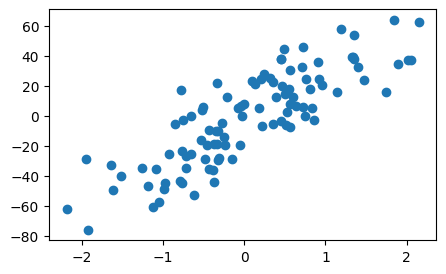

In [166]:
x,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)
plt.figure(figsize=(5,3))
plt.scatter(x,y)

#### OLS using sklearn

[28.12597332]
-2.2710144261783825


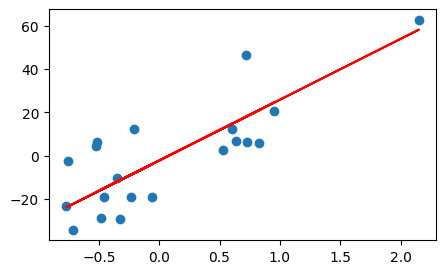

In [167]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
print(lr.coef_)
print(lr.intercept_)

plt.figure(figsize=(5,3))
plt.scatter(x_test,y_test)
plt.plot(x_test,lr.predict(x_test),color='red')

In [168]:
y_pred = lr.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345158782661012

#### From Scratch using Gradient Descent

In [169]:
class GDRegressor:

    def __init__(self,learning_rate=0.01,epochs=100):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, x, y):
        self.coef_ = np.ones(x.shape[1])
        self.intercept_ = 0

        for i in range(self.epochs):
            y_hat = np.dot(x,self.coef_) + self.intercept_
            intercept_der = -2 * np.mean(y - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)

            coef_der = -2 * np.dot((y - y_hat),x)/x.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)
        print(self.coef_, self.intercept_)

    def predict(self,x):
        return np.dot(x,self.coef_) + self.intercept_

[28.12509004] -2.2706114498872543


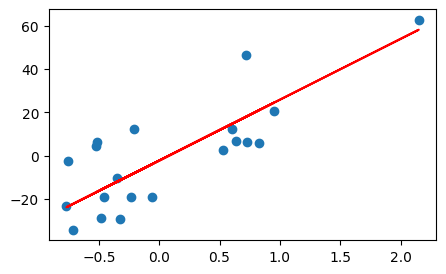

In [170]:
gd = GDRegressor(0.1, 50)
gd.fit(x_train, y_train)

plt.figure(figsize=(5,3))
plt.scatter(x_test,y_test)
plt.plot(x_test,gd.predict(x_test),color='red')

In [171]:
y_pred = gd.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.634519564028075

### Stochastic Gradient Descent

In [172]:
X,y = load_diabetes(return_X_y=True)
print(X.shape)
print(y.shape)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

(442, 10)
(442,)


In [173]:
reg = LinearRegression()
reg.fit(X_train,y_train)

print("Coeff", reg.coef_, "\n")
print("Intercept", reg.intercept_, "\n")

y_pred = reg.predict(X_test)
print(r2_score(y_test,y_pred))

Coeff [  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238] 

Intercept 151.88331005254167 

0.4399338661568968


In [174]:
class StochasticGDRegressor:

    def __init__(self,learning_rate=0.01,epochs=100):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, x, y):
        self.coef_ = np.ones(x.shape[1])
        self.intercept_ = 0

        for i in range(self.epochs):
            for j in range(x.shape[0]):

                idx = np.random.randint(0,x.shape[0])
                y_hat = np.dot(x[idx],self.coef_) + self.intercept_

                intercept_der = -2 * np.mean(y[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)

                coef_der = -2 * np.dot((y[idx] - y_hat),x[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)
        print("Coef", self.coef_, "\n")
        print("Intercept", self.intercept_, "\n")

    def predict(self,x):
        return np.dot(x,self.coef_) + self.intercept_

In [175]:
sgd = StochasticGDRegressor(learning_rate=0.01,epochs=40)
start = time.time()
sgd.fit(X_train,y_train)
print("The time taken is",time.time() - start, "\n")

y_pred = sgd.predict(X_test)
print(r2_score(y_test,y_pred), "\n")

Coef [  62.5285889   -54.70921937  317.77887648  231.47437128   33.9454817
   -7.18106682 -156.36990118  128.16933603  290.29920494  133.14033358] 

Intercept 154.4317614086011 

The time taken is 0.10964822769165039 

0.4211000017135462 



In [176]:
from sklearn.linear_model import SGDRegressor

reg = SGDRegressor(max_iter=100,learning_rate='constant',eta0=0.01)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(reg.coef_)
print(reg.intercept_)
print(r2_score(y_test,y_pred))


[  55.99856016  -66.14693503  347.94688364  245.93959501   17.99743301
  -27.55490735 -172.57923789  128.91916221  316.51464431  128.08078879]
[152.27716325]
0.4330903955363459


c:\My Space\ML\MLvenv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


### Mini Batch Gradient Descent

In [177]:
class MBGDRegressor:
    
    def __init__(self,batch_size,learning_rate=0.01,epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        
    def fit(self,X_train,y_train):
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            
            for j in range(int(X_train.shape[0]/self.batch_size)):
                
                idx = random.sample(range(X_train.shape[0]),self.batch_size)
                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_
                
                intercept_der = -2 * np.mean(y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)

                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)
        
        print("Intercept ",self.intercept_, "\n")
        print("Coefficient ",self.coef_, "\n")
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [178]:
mbr = MBGDRegressor(batch_size=int(X_train.shape[0]/50),learning_rate=0.01,epochs=100)
mbr.fit(X_train,y_train)
y_pred = mbr.predict(X_test)
print(r2_score(y_test,y_pred))

Intercept  151.2924778803315 

Coefficient  [  34.78204582 -151.50344927  455.23096054  304.90142554  -28.74207435
 -100.06919236 -188.9114473   111.9287338   411.04798224  113.17853553] 

0.454184237584081


In [179]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(learning_rate='constant',eta0=0.1)
batch_size = 35

for i in range(100):
    
    idx = random.sample(range(X_train.shape[0]),batch_size)
    sgd.partial_fit(X_train[idx],y_train[idx])

print("Coeff ",sgd.coef_, "\n")
print("Intercept ",sgd.intercept_, "\n")
y_pred = sgd.predict(X_test)
print(r2_score(y_test,y_pred))

Coeff  [  37.25157581  -77.06417204  345.94890757  244.82492084   31.44306401
  -17.35487187 -169.68815304  134.72364689  324.35339746  119.85320063] 

Intercept  [150.0411949] 

0.4332578708838447
